# Apprentissage des réseaux profonds

## 1. Importation des librairies

In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Pour les utilisateurs de MacOS  (pour utiliser plt & keras en même temps)
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# pour desactiver les warnings 
# import warnings
# warnings.filterwarnings('ignore')
# pour la reproductibilité des résultats
from numpy.random import seed
seed(1)
tf.compat.v1.set_random_seed(1)

## 2. Chargement des données d'apprentissage : la base MNIST

In [47]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [48]:
# Observez la dimension des données. A quoi correspondent ces dimensions ?
print(f"La dimention de la base de données d'apprentissage : {train_images.shape}")
print(f"La dimention de la base de données de test         : {test_images.shape}")
print(f"Nombre de classes de la base de données            : {len(np.unique(train_labels))}")
print(f"Les labels des classe de la base de données        : {np.sort(np.unique(train_labels))}")

La dimention de la base de données d'apprentissage : (60000, 28, 28)
La dimention de la base de données de test         : (10000, 28, 28)
Nombre de classes de la base de données            : 10
Les labels des classe de la base de données        : [0 1 2 3 4 5 6 7 8 9]


Récupérez la dimension des images


In [49]:
height = train_images.shape[1]
width = train_images.shape[2]

Affichez la première image de la base d'apprentissage

Text(0.5, 1.0, 'label : 5')

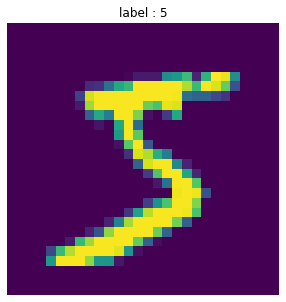

In [50]:
num_ex = 0
im = train_images[num_ex]
plt.figure(figsize=(5, 5))
plt.imshow(im); plt.axis(False)
plt.title(f'label : {train_labels[num_ex]}')

Affichez son label associé

In [51]:
print('label : {}'.format(train_labels[num_ex]))

label : 5


## 3. Conditionnement des données

Quelles sont les valeurs extrèmes des pixels ? pourquoi divise-t-on par 255.0 ?

In [52]:
print("min : {}, max : {}".format(im.min() , im.max()))

min : 0, max : 255


In [53]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# train_images = train_images.astype('float32') / 255  # équivalent

Pourquoi divise-t-on par 255.0 ?

La raison en est la suivante: Sachant que chaque neurone calcule la somme de ses entrées $X$ pondérées par des poids $W$ et le biais $\Theta$. Lorsque les valeurs du vecteur d'entrée ne sont pas dans la même échelle de grandeur, ce dernier peut peut efficacement annulé en modifiant les poids et les biais correspondants, ce qui laisse le vecteur d'entrée intact.

Peut-on utiliser directement les images en entrée du MLP ? Pourquoi ?  
Proposer une solution

Les entrées des réseau de neurones sont des vecteurs à dimension $(m, 1)$. Or, comme nous l'avons vu précédemment les dimensions des images de la base d'entrainement est $(n, n)$. La solution est de redimensionné les image sous forme $(n X n, 1)$

In [41]:
# train_images = np.reshape(train_images,(train_images.shape[0],height*width))
# test_images = np.reshape(test_images,(test_images.shape[0],height*width))

Utiliser l'encodage "one hot" pour les labels des données d'apprentissage et de test.  
Indice : https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical  
Quelle doit-être la nouvelle dimensions des labels ?

In [54]:
# One hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
# Observer les nouvelles dimension des données d'apprentissage
train_labels.shape

(60000, 10)

## 3. Architecture du réseau 

Premier réseau - MLP à 1 couche cachée avec :
- en amont, une couche pour "applatir" les données 2D (flatten)
- 25 neurones sur la couche cachée
- des fonctions d'activation sigmoïde
- la fonction de coût erreur quadratique moyenne
- une optimisation par déscente de gradient stochastique (taux d'apprentissage $10^{-3}$ et momentum $0.9$)

In [56]:
## Définition du modèle

## Définition de l'architecture du modèle
mnist_model = tf.keras.models.Sequential()
# Expliquez à quoi correspondent les valeurs numériques qui définissent les couches du réseau
mnist_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
mnist_model.add(tf.keras.layers.Dense(100 ,input_shape=(784,),  activation='relu'))
mnist_model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

mnist_model.add(tf.keras.layers.Dense(50 ,input_shape=(100,),  activation='relu'))
mnist_model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

mnist_model.add(tf.keras.layers.Dense(25 ,input_shape=(50,),  activation='relu'))
mnist_model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

mnist_model.add(tf.keras.layers.Dense(10 , activation='softmax'))

sgd = tf.keras.optimizers.Adam()  #SGD(lr=0.001, momentum=0.9) 

mnist_model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])





On affiche l'architecture du réseau

In [57]:
# visualisation du nombre de paramètres du réseau
mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_7 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 25)               

## 4. Apprentissage du réseau

Avec des batchs de taille 64 et 10 epochs

In [58]:
mnist_model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.9118
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1241 - accuracy: 0.9631
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0945 - accuracy: 0.9715
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0763 - accuracy: 0.9768
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0627 - accuracy: 0.9804
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0562 - accuracy: 0.9825
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0496 - accuracy: 0.9840
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0390 - accuracy: 0.9872
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0354 - accuracy: 0.9884

## 5. Evaluation du modèle sur la base de test

__Attention__ : en toute rigueur, l'evaluation devrait être menée sur une base de validation (fragment de la base de d'apprentissage)

In [59]:
## Evaluation du modèle 
test_loss, test_acc = mnist_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0742 - accuracy: 0.9780
Test accuracy: 0.9779999852180481


## 6. Visualisation des poids du réseau

On utilise la méthodes get_weights() pour récupérer la liste des poids : 
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#get_weights  
La méthode retourne une liste de deux tableaux : les poids et les biais de la couche

In [60]:
# visualiser la couche de poids
# Observer les différences en fonction de la méthode d'optimisation et de l'architecture du réseau
# layers[1] pour passer le flatten et arriver sur la première couche
# get_weights()[0] -> les poids
# get_weights()[1] -> les biais
mnist_model.layers[1].get_weights()[1].shape
weights_all  = mnist_model.layers[1].get_weights()[0]



On peut visualiser ces poids. Comment peut-on interpréter ces images ?

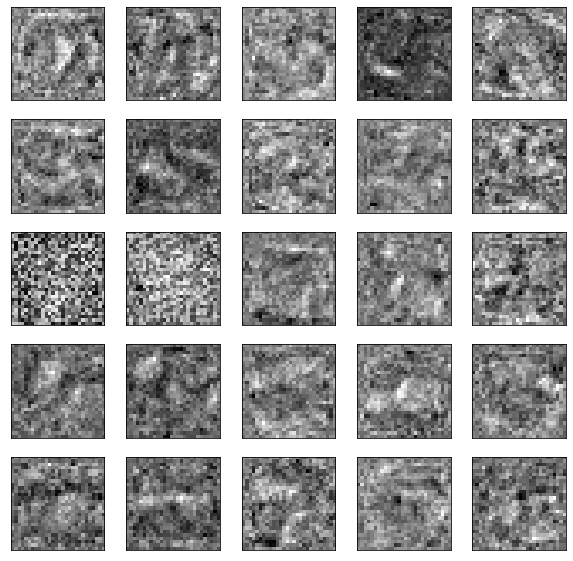

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    vis = np.reshape(weights_all[:,i],(height,width))
    plt.imshow(vis, cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

## 7. A faire

1) Evaluer l'influence sur les performances et les "images des poids" lorsque l'on augmente d'un facteur 10 :
- le nombre d'epochs
- le pas d'apprentissage

2) Tester la fonction de cout entropie croisée

3) Tester la fonction d'activation softmax sur la dernière couche

4) Améliorer encore les performances du réseau en :
- Augmentant le nombre de neurones sur la couche cachée
- Augmentant la profondeur du réseau
- Changeant la méthode d'optimisation 
- Utilisant la normalisation par batch (batch norm)

Reporter la justesse (accuracy) pour les différentes architectures testées